In [1]:
# Importing required libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset :
media_net = pd.read_csv('media_net.csv')
media_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
media_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# understanding the dataset :
# Ihe dataset contains a unique user id for their employee and the gender, age and salary of the employee and
# at the  last we have purchased col denoting whether the employee has bought the product (1) or not (0).

In [5]:
# In this svm classifier model we are going to classify whether a employee of a particular age and salary 
# will buy their given product or not.(denoted by 0 or 1).

In [6]:
# Now just take view on the null or duplicate vals :
media_net.isnull().sum()
# No null vals.

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
media_net.duplicated().sum()

0

In [8]:
# So there are no missing vals or not any duplicate vals.

In [9]:
# Now lets visualize the data in order to understand the distribution of the cols and the uniqueness
# of the vals in a respective col.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


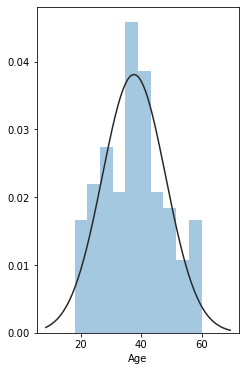

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


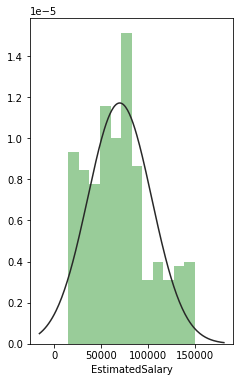

In [10]:
# 1st we look at the distribution og the age and salary :
# (distribution with a histogram and maximum likelihood gaussian distribution fit)

from scipy.stats import norm
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.distplot(media_net['Age'], fit=norm, kde=False,)
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
sns.distplot(media_net['EstimatedSalary'], color= 'green', fit=norm, kde=False)
plt.show()


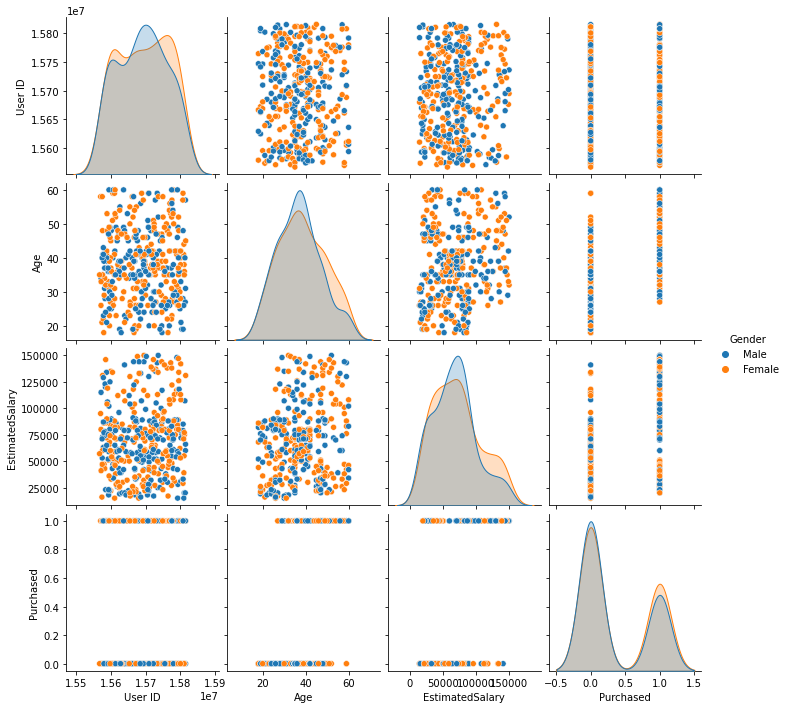

In [11]:
sns.pairplot(media_net, hue='Gender')
plt.show()

In [12]:
# Now make male to 1 amd female to 0 in order to avooid further problems :
#media_net['Gender'] = media_net['Gender'].map({'Male':1 ,'Female':0})
#media_net = media_net.replace({'Gender': {'Male': '1', 
#                                'Female': '0'}})
#media_net['Gender'].replace('0', 'Female')
#media_net['Gender'].replace('1', 'Male')
#media_net.head()

In [13]:
# Removing unnecessary cols (Gender) :
new_data = media_net[['Age','EstimatedSalary','Purchased']]
new_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
# setting x and y :
x = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [15]:
print(x.head())
print(x.shape)

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
(400, 2)


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [17]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# 1) linear kernel (Linear data) :

In [19]:
# Split the data into the train and test data :
# one third to test and the two third to the test data.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [20]:
#Feature Scaling : (In order to boost the speed and accuracy )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# now trian SVM classifier model on training data :
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', gamma= 'auto', random_state = 0)

In [22]:
# fitting feature vals :
svm_fit = svm_model.fit(x_train, y_train)

# predicting test data :
svm_pred = svm_model.predict(x_test)

In [23]:
# Support vectors : (in eaach class)
svm_model.support_vectors_

array([[ 0.80089571, -0.3183322 ],
       [ 0.22654819, -0.28914526],
       [ 0.41799736,  0.26540655],
       [ 0.41799736,  0.00272411],
       [ 0.22654819, -0.25995832],
       [ 1.18379406, -0.75613626],
       [ 0.03509902,  1.22857548],
       [ 0.70517112,  0.26540655],
       [ 0.60944654, -0.90207094],
       [-0.06062557,  0.20703268],
       [ 0.32227278, -0.20158445],
       [ 0.22654819, -0.37670607],
       [ 0.22654819, -0.37670607],
       [-0.53924851,  1.37451017],
       [ 0.41799736, -0.17239751],
       [ 0.41799736, -0.49345382],
       [ 0.22654819,  0.06109799],
       [-0.06062557, -0.23077138],
       [ 1.08806947, -0.14321057],
       [ 0.32227278, -0.28914526],
       [-0.25207475,  1.11182773],
       [ 0.03509902, -0.3183322 ],
       [ 0.32227278,  0.06109799],
       [-0.25207475,  0.52808899],
       [ 0.32227278,  0.03191105],
       [ 0.41799736, -0.46426688],
       [-0.06062557,  0.06109799],
       [-0.44352392,  1.25776242],
       [ 0.1308236 ,

In [24]:
# No. of support vectros for each class
svm_model.n_support_

array([60, 60])

In [25]:

# Comnfusion Matrix for the SVM Model ;
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix :', conf_mat)

Confusion Matrix : [[60  6]
 [ 7 27]]


In [26]:
# Accuracy of the SVM Model :
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, svm_pred)
print ("Accuracy Of SVM Model: ", accuracy*100)

Accuracy Of SVM Model:  87.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


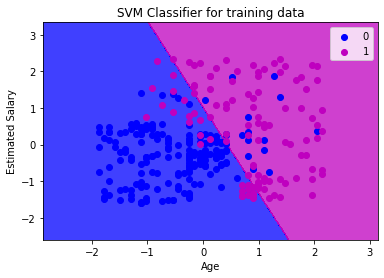

In [27]:
# Visualization for training data :
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('b','m')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('b', 'm'))(i), label = j)
plt.title('SVM Classifier for training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


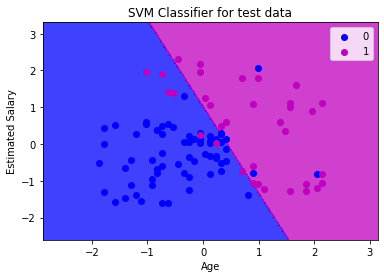

In [28]:
# Visualization for test data :
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('b', 'm')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('b', 'm'))(i), label = j)
plt.title('SVM Classifier for test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [29]:
# Conclusion : 
# As we can see there are about 14 incorrect predictions using linear as kernel and accuracy of model is quit low.
# It is because the data we have choosen is non-linear (can see in the scatter plot) and the linear kernel have good impact on
# the linear data.
# Now we are going to use the next kerner rbf and polynomial which are specifically used for the non-linear type of data in 
# order make better predictions.

# 2) rbf kernel (Non-Linear data) :


In [30]:
# Split the data into the train and test data :
# one third to test and the two third to the test data.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [31]:
#Feature Scaling : (In order to boost the speed and accuracy )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
# now trian SVM classifier model on training data :
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma= 'auto', random_state = 0)

In [33]:
# fitting feature vals :
svm_fit = svm_model.fit(x_train, y_train)

# predicting test data :
svm_pred = svm_model.predict(x_test)

In [34]:
# support vectors :
svm_model.support_vectors_

array([[ 1.18592948, -0.79108203],
       [ 0.30431891,  0.01575248],
       [ 0.79410256, -0.35884926],
       [ 0.20636218,  0.10219904],
       [ 0.10840545,  0.21746111],
       [-0.28342147,  0.47680078],
       [ 0.10840545,  0.15983008],
       [-0.28342147,  1.05311115],
       [ 0.79410256,  0.07338352],
       [-0.57729167,  1.31245081],
       [ 1.38184295,  1.22600426],
       [-1.06707532,  0.53443182],
       [-1.06707532,  0.5056163 ],
       [ 0.89205929, -0.70463548],
       [ 0.40227564, -0.18595615],
       [ 1.28388622,  1.80231463],
       [-0.77320513,  1.2836353 ],
       [-0.47933493,  1.19718874],
       [ 0.30431891,  0.01575248],
       [ 0.79410256, -1.42502344],
       [-0.77320513,  0.5056163 ],
       [ 0.30431891,  0.01575248],
       [-1.85072916, -1.51147   ],
       [ 0.30431891,  0.01575248],
       [ 0.30431891, -1.19449929],
       [ 0.99001602,  2.00402326],
       [ 2.06754006,  0.33272319],
       [ 0.01044872,  0.24627663],
       [ 0.40227564,

In [35]:
# No. of support vectros for each class
svm_model.n_support_

array([43, 46])

In [36]:
# Comnfusion Matrix for the SVM Model ;
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix :', conf_mat)

Confusion Matrix : [[66  4]
 [ 2 28]]


In [37]:
# Accuracy of the SVM Model :
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, svm_pred)
print ("Accuracy Of SVM Model: ", accuracy*100)

Accuracy Of SVM Model:  94.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


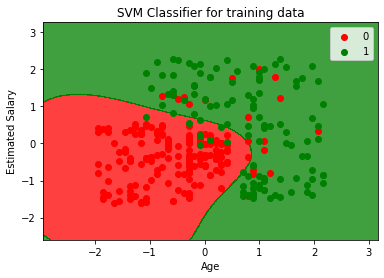

In [38]:
# Visualization for training data :
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('r','g')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('r', 'g'))(i), label = j)
plt.title('SVM Classifier for training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


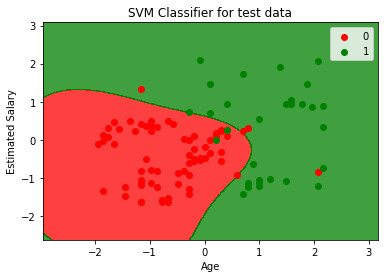

In [39]:
# Visualization for test data :
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('r', 'g')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('r', 'g'))(i), label = j)
plt.title('SVM Classifier for test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [40]:
# Conclusion : 
# From the above visualization we can see there are around 6 incoorect predictions using rbf as kernel and also the model 
# accuraacy is also increases.

In [41]:
# 3) 

In [42]:
# now trian SVM classifier model on training data :
from sklearn.svm import SVC
svm_model = SVC(kernel='poly', gamma= 'auto', random_state = 5)

In [43]:
#Feature Scaling : (In order to boost the speed and accuracy )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
# fitting feature vals :
svm_fit = svm_model.fit(x_train, y_train)

# predicting test data :
svm_pred = svm_model.predict(x_test)

In [45]:
# Support vectors :
# No. of support vectros for each class
svm_model.support_vectors_

array([[ 1.18592948, -0.79108203],
       [-0.28342147, -0.18595615],
       [ 0.30431891,  0.01575248],
       [ 0.79410256, -0.35884926],
       [ 0.20636218, -0.33003374],
       [ 0.40227564, -0.21477166],
       [ 0.20636218,  0.10219904],
       [ 0.10840545,  0.21746111],
       [-0.08750801,  0.10219904],
       [ 0.10840545,  0.15983008],
       [-0.28342147,  1.05311115],
       [ 0.79410256,  0.07338352],
       [ 0.10840545, -0.01306304],
       [-0.57729167,  1.31245081],
       [ 1.38184295,  1.22600426],
       [ 0.01044872, -0.01306304],
       [ 0.10840545,  0.044568  ],
       [-0.08750801,  0.24627663],
       [ 0.89205929, -0.70463548],
       [ 0.40227564, -0.18595615],
       [ 1.28388622,  1.80231463],
       [ 0.30431891, -0.56055789],
       [-0.47933493,  1.19718874],
       [ 0.30431891,  0.01575248],
       [-0.08750801,  0.01575248],
       [-0.08750801,  0.24627663],
       [ 0.79410256, -1.42502344],
       [ 0.20636218, -0.18595615],
       [ 0.40227564,

In [46]:
# No. of support vectros for each class
svm_model.n_support_

array([63, 65])

In [47]:
# Comnfusion Matrix for the SVM Model ;
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix :', conf_mat)

Confusion Matrix : [[69  1]
 [10 20]]


In [48]:
# Accuracy of the SVM Model :
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, svm_pred)
print ("Accuracy Of SVM Model: ", accuracy*100)

Accuracy Of SVM Model:  89.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


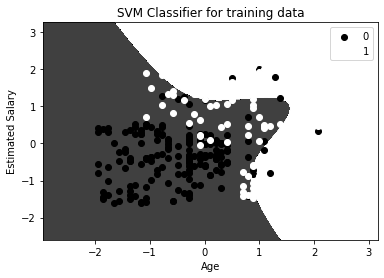

In [49]:
# Visualization for training data :
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('k','w')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('k', 'w'))(i), label = j)
plt.title('SVM Classifier for training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


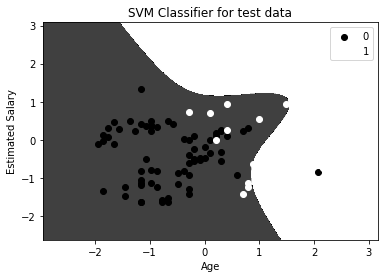

In [50]:
# Visualization for test data :
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('k', 'w')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('k', 'w'))(i), label = j)
plt.title('SVM Classifier for test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [51]:
# Conclusion :
# As we can see in above figure the model predict alomost 11 incorect values even we are having non-linear data. 
# It is beacase , here we are making predictions for the dependent variables. If we have densed data and some independent
# features the polynomial kernel will make better predictions.